In [1]:
using Turing
using LimberJack
using LinearAlgebra
using CSV
using NPZ
using PyPlot
using ForwardDiff
using GaussianProcess

In [2]:
files = npzread("../data/DESY1_cls/wlwl.npz");
nz_path = "../data/DESY1_cls/fullmarg_nzs/"

"../data/DESY1_cls/fullmarg_nzs/"

In [3]:
cov_tot = files["cov"]
inv_cov_tot = files["inv_cov"]
data_vector = files["cls"];

In [4]:
zs_k0, nz_k0, cov_k0 = get_nzs(nz_path, "20")
zs_k1, nz_k1, cov_k1 = get_nzs(nz_path, "21")
zs_k2, nz_k2, cov_k2 = get_nzs(nz_path, "22")
zs_k3, nz_k3, cov_k3 = get_nzs(nz_path, "23")

(Float32[0.02, 0.06, 0.099999994, 0.14, 0.18, 0.22, 0.26, 0.3, 0.34, 0.38  …  3.62, 3.66, 3.7, 3.74, 3.78, 3.82, 3.8600001, 3.9, 3.94, 3.98], [0.0, 0.005984172563510772, 0.03765643218161212, 0.028133875010282052, 0.026655211697212404, 0.06408162232970639, 0.02553711344743602, 0.03706050250131086, 0.0216295539779018, 0.04669891197796871  …  0.0, 0.0, 0.0, 0.0006562865728945231, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.6708037247042034e-8 5.802577730455622e-5 … 0.0 0.0; 0.0 5.804248534180326e-5 … 0.0 0.0; … ; 0.0 5.802577730455622e-5 … 1.6708037247042034e-8 0.0; 0.0 5.802577730455622e-5 … 0.0 1.6708037247042034e-8])

In [5]:
err_k0 = sqrt.(diag(cov_k0))
err_k1 = sqrt.(diag(cov_k1))
err_k2 = sqrt.(diag(cov_k2))
err_k3 = sqrt.(diag(cov_k3));

In [368]:
using Interpolations

In [473]:
l_X = LinRange(0, 1.1, 20)
X = exp.(l_X) .- 1;

In [474]:
nz_k0_itp = LinearInterpolation(zs_k0, nz_k0, extrapolation_bc=Line())
err_k0_itp = LinearInterpolation(zs_k0, err_k0, extrapolation_bc=Line())

nz_k1_itp = LinearInterpolation(zs_k1, nz_k1, extrapolation_bc=Line())
err_k1_itp = LinearInterpolation(zs_k1, err_k1, extrapolation_bc=Line());

nz_k2_itp = LinearInterpolation(zs_k2, nz_k2, extrapolation_bc=Line())
err_k2_itp = LinearInterpolation(zs_k2, err_k2, extrapolation_bc=Line());

nz_k3_itp = LinearInterpolation(zs_k3, nz_k3, extrapolation_bc=Line())
err_k3_itp = LinearInterpolation(zs_k3, err_k3, extrapolation_bc=Line());

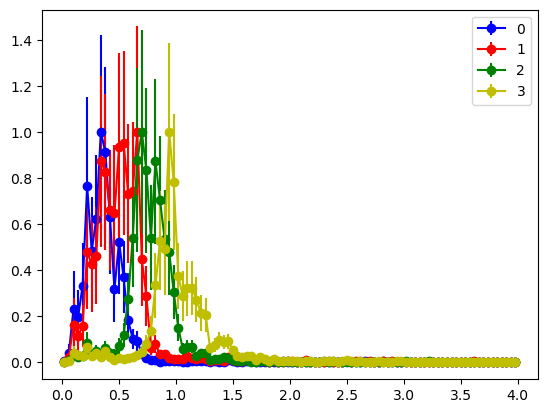

In [475]:
plt.errorbar(zs_k0, nz_k0, yerr=err_k0, fmt="bo-", label="0")
plt.errorbar(zs_k1, nz_k1, yerr=err_k1, fmt="ro-", label="1")
plt.errorbar(zs_k2, nz_k2, yerr=err_k2, fmt="go-", label="2")
plt.errorbar(zs_k3, nz_k3, yerr=err_k3, fmt="yo-", label="3")
plt.legend()
plt.show()

In [476]:
nz_k0_lite = nz_k0_itp(X) 
err_k0_lite = err_k0_itp(X).^2
cov_k0_lite = err_k0_lite.^2 

nz_k1_lite = nz_k1_itp(X) 
err_k1_lite = err_k1_itp(X)
cov_k1_lite = err_k1_lite.^2 

nz_k2_lite = nz_k2_itp(X)
err_k2_lite = err_k2_itp(X).^2 
cov_k2_lite = err_k2_lite.^2 

nz_k3_lite = nz_k3_itp(X)
err_k3_lite = err_k3_itp(X).^2 
cov_k3_lite = err_k3_lite.^2;

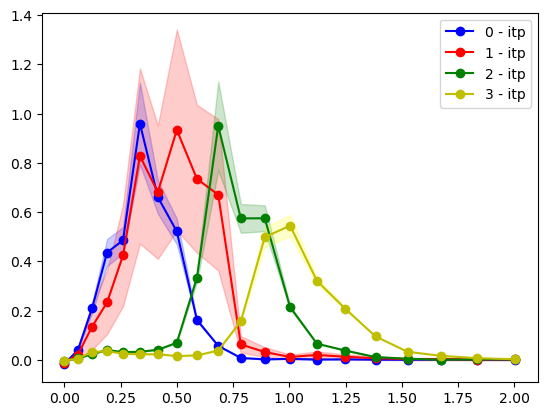

In [477]:
plt.plot(X, nz_k0_itp(X), "bo-", label="0 - itp")
plt.fill_between(X, nz_k0_lite .+  err_k0_lite,
                    nz_k0_lite .-  err_k0_lite,
                 color="blue", alpha=0.2)

plt.plot(X, nz_k1_itp(X), "ro-", label="1 - itp")
plt.fill_between(X, nz_k1_lite .+  err_k1_lite,
                    nz_k1_lite .-  err_k1_lite,
                 color="red", alpha=0.2)

plt.plot(X, nz_k2_itp(X), "go-", label="2 - itp")
plt.fill_between(X, nz_k2_lite .+  err_k2_lite,
                    nz_k2_lite .-  err_k2_lite,
                 color="green", alpha=0.2)

plt.plot(X, nz_k3_itp(X), "yo-", label="3 - itp")
plt.fill_between(X, nz_k3_lite .+  err_k3_lite,
                    nz_k3_lite .-  err_k3_lite,
                 color="yellow", alpha=0.2)
plt.legend()
plt.show()

In [479]:
npzwrite("../data/DESY1/lite20_nzs/nz_DESwl__0_e.npz", Dict("z" => X, "dndz"=> nz_k0_lite, "cov"=> cov_k0_lite))
npzwrite("../data/DESY1/lite20_nzs/nz_DESwl__1_e.npz", Dict("z" => X, "dndz"=> nz_k1_lite, "cov"=> cov_k1_lite))
npzwrite("../data/DESY1/lite20_nzs/nz_DESwl__2_e.npz", Dict("z" => X, "dndz"=> nz_k2_lite, "cov"=> cov_k2_lite))
npzwrite("../data/DESY1/lite20_nzs/nz_DESwl__3_e.npz", Dict("z" => X, "dndz"=> nz_k3_lite, "cov"=> cov_k3_lite))

In [179]:
#                Omega_b,           Omega_c          n_s,                 h,
#                DESgc__0_gc_b,     DESgc__1_gc_b,   DESgc__2_gc_b,    DESgc__3_gc_b,    DESgc__4_gc_b,
#                DESgc__0_dz,      DESgc__1_dz,      DESgc__2_dz,      DESgc__3_dz,      DESgc__4_dz,
#                wl_ia_A,          wl_ia_eta, 
#                DESwl__0_wl_m,    DESwl__1_wl_m,    DESwl__2_wl_m,    DESwl__3_wl_m,
#                DESwl__0_dz,      DESwl__1_dz,      DESwl__2_dz,      DESwl__3_dz,
#                sigma_8,          Omega_m
pars = [4.426868e-02,     2.093138e-01,     8.963611e-01,     8.495440e-01,
         1.343888e+00,    1.639047e+00,      1.597174e+00,     1.944583e+00,     2.007245e+00,
        -4.679383e-03,   -2.839996e-03,      1.771571e-03,     1.197051e-03,    -5.199799e-03,
         2.389208e-01,   -6.435288e-01, 
         1.802722e-03,   -5.508994e-03,     1.952514e-02,    -1.117726e-03,
        -1.744083e-02,    6.777779e-03,    -1.097939e-03,    -4.912315e-03,
         8.536883e-01,    2.535825e-01];

In [180]:
nuisances = Dict("b0" => pars[5],
                 "b1" => pars[6],
                 "b2" => pars[7],
                 "b3" => pars[8],
                 "b4" => pars[9],
                 "dz_g0" => pars[10],
                 "dz_g1" => pars[11],
                 "dz_g2" => pars[12],
                 "dz_g3" => pars[13],
                 "dz_g4" => pars[14],
                 "dz_k0" => pars[21],
                 "dz_k1" => pars[22],
                 "dz_k2" => pars[23],
                 "dz_k3" => pars[24],
                 "m0" => pars[17],
                 "m1" => pars[18],
                 "m2" => pars[19],
                 "m3" => pars[20],
                 "A_IA" => pars[15],
                 "alpha_IA" => pars[16]);

In [38]:
@model function model(data_vector; cov_tot=cov_tot, nz_path=nz_path)
    #KiDS priors
    Ωm ~ Uniform(0.1, 0.6)
    Ωb = pars[1]
    h = pars[4]
    ns = pars[3]
    s8 = pars[25]
    
    Nz_k0 ~ MvNormal(nz_k0, cov_k0)
    Nz_k1 ~ MvNormal(nz_k1, cov_k1)
    Nz_k2 ~ MvNormal(nz_k2, cov_k2)
    Nz_k3 ~ MvNormal(nz_k3, cov_k3)

    nuisances = Dict("nz_k0" => Nz_k0,
                     "nz_k1" => Nz_k1,
                     "nz_k2" => Nz_k2,
                     "nz_k3" => Nz_k3,
                     "m0" => pars[17],
                     "m1" => pars[18],
                     "m2" => pars[19],
                     "m3" => pars[20],
                     "A_IA" => pars[15],
                     "alpha_IA" => pars[16])
    
    cosmology = LimberJack.Cosmology(Ωm, Ωb, h, ns, s8,
                                     tk_mode="EisHu",
                                     Pk_mode="Halofit")
    
    theory = Theory(cosmology, files;
                    nz_path=nz_path,
                    Nuisances=nuisances)
    
    data_vector ~ MvNormal(theory, cov_tot)
end;

In [39]:
iterations = 300
nadapts = 100;

In [40]:
chain3 = sample(model(data_vector), NUTS(5, 0.1; init_ϵ=0.03), iterations,
                progress=true; save_state=true);

LoadError: PosDefException: matrix is not positive definite; Cholesky factorization failed.

In [32]:
chain1 = sample(model(data_vector), MH(), iterations,
            nadapt=nadapts, progress=true; save_state=true);

LoadError: MethodError: no method matching PDMats.PDMat(::Hermitian{Float64, Matrix{Float64}})
[0mClosest candidates are:
[0m  PDMats.PDMat(::AbstractMatrix, [91m::Cholesky{T, S}[39m) where {T, S} at ~/.julia/packages/PDMats/G0Prn/src/pdmat.jl:12
[0m  PDMats.PDMat([91m::Cholesky[39m) at ~/.julia/packages/PDMats/G0Prn/src/pdmat.jl:21
[0m  PDMats.PDMat([91m::Symmetric[39m) at ~/.julia/packages/PDMats/G0Prn/src/pdmat.jl:20
[0m  ...

# New heading

# New heading